# 17장 확률적 프로그램, 확률 그리고 분포

<table align="left"><tr><td>
<a href="https://colab.research.google.com/github/rickiepark/python4daml/blob/main/17장.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="코랩에서 실행하기"/></a>
</td></tr></table>

In [1]:
import matplotlib.pyplot as plt

#선 두께
plt.rcParams['lines.linewidth'] = 4
#제목 폰트 크기
plt.rcParams['axes.titlesize'] = 16
#축 레이블 폰트 크기
plt.rcParams['axes.labelsize'] = 16
#x 축 텍스트 크기
plt.rcParams['xtick.labelsize'] = 16
#y 축 텍스트 크기
plt.rcParams['ytick.labelsize'] = 16
#x 축 눈금 크기
plt.rcParams['xtick.major.size'] = 7
#y 축 눈금 크기
plt.rcParams['ytick.major.size'] = 7
#마커 크기
plt.rcParams['lines.markersize'] = 10
#범례를 표시할 때 마커 표시 개수
plt.rcParams['legend.numpoints'] = 1
#범례 텍스트 크기
plt.rcParams['legend.fontsize'] = 14

## 17.1 확률적 프로그램 

In [2]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.integrate 

그림 17-1 주사위 던지기

In [3]:
def roll_die(): 
    """1과 6 사이의 랜덤한 정수를 반환합니다""" 
    return random.choice([1,2,3,4,5,6]) 

def roll_n(n): 
    result = '' 
    for i in range(n): 
        result = result + str(roll_die()) 
    print(result) 

## 17.2 간단한 확률 계산하기

## 17.3 추론 통계

그림 17-2 동전 던지기

In [4]:
def flip(num_flips): 
    """num_flips는 양의 정수라고 가정합니다""" 
    heads = 0 
    for i in range(num_flips): 
        if random.choice(('H', 'T')) == 'H': 
            heads += 1 
    return heads/num_flips 

def flip_sim(num_flips_per_trial, num_trials): 
    """num_flips_per_trial과 num_trials는 양의 정수라고 가정합니다""" 
    frac_heads = [] 
    for i in range(num_trials): 
        frac_heads.append(flip(num_flips_per_trial)) 
    mean = sum(frac_heads)/len(frac_heads) 
    return mean 

In [5]:
random.seed(0)
print('평균 =', flip_sim(10, 1))

평균 = 0.2


In [6]:
print('평균 =', flip_sim(10, 1))

평균 = 0.6


In [7]:
random.seed(0)
flip_sim(10, 100)

0.5029999999999999

In [8]:
flip_sim(10, 100)

0.496

그림 17-3 평균으로 회귀 

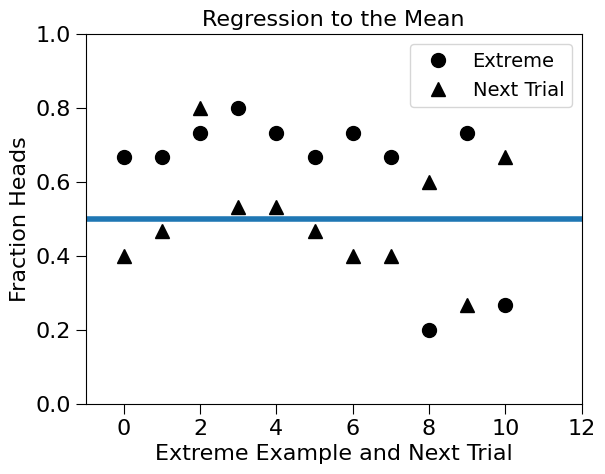

In [9]:
def regress_to_mean(num_flips, num_trials): 
    #num_flips 번 동전을 던져서 앞면이 나온 비율을 구합니다
    frac_heads = [] 
    for t in range(num_trials): 
        frac_heads.append(flip(num_flips)) 
    #극단적인 결과가 나온 시도를 찾고 다음 시도를 저장합니다
    extremes, next_trials = [], [] 
    for i in range(len(frac_heads) -1): 
        if frac_heads[i] < 0.33 or frac_heads[i] > 0.66: 
            extremes.append(frac_heads[i]) 
            next_trials.append(frac_heads[i+1]) 
    #결과를 그래프로 그립니다
    plt.plot(range(len(extremes)), extremes, 'ko', 
             label = 'Extreme') 
    plt.plot(range(len(next_trials)), next_trials, 'k^', 
             label = 'Next Trial') 
    plt.axhline(0.5) 
    plt.ylim(0, 1) 
    plt.xlim(-1, len(extremes) + 1) 
    plt.xlabel('Extreme Example and Next Trial') 
    plt.ylabel('Fraction Heads') 
    plt.title('Regression to the Mean') 
    plt.legend(loc = 'best') 

random.seed(0)
regress_to_mean(15, 50) 

그림 17-5 동전 던지기 결과 그리기

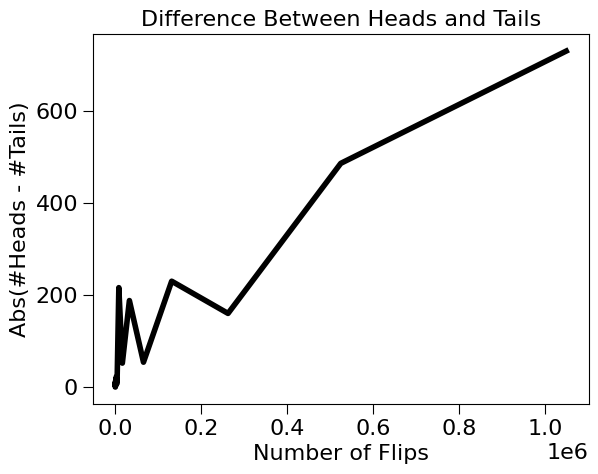

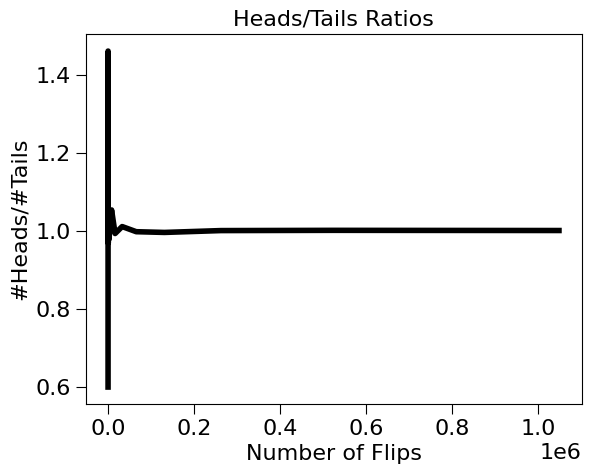

In [10]:
def flip_plot(min_exp, max_exp): 
    """min_exp와 max_exp는 양의 정수이고 min_exp < max_exp라고 가정합니다.
       2**min_exp에서 2**max_exp 사이의 동전 던지기 결과를 그래프로 그립니다""" 
    ratios, diffs, xAxis = [], [], [] 
    for exp in range(min_exp, max_exp + 1): 
        xAxis.append(2**exp) 
    for num_flips in xAxis: 
        num_heads = 0 
        for n in range(num_flips): 
            if random.choice(('H', 'T')) == 'H': 
                num_heads += 1 
        num_tails = num_flips - num_heads 
        try: 
            ratios.append(num_heads/num_tails) 
            diffs.append(abs(num_heads - num_tails)) 
        except ZeroDivisionError: 
            continue 
    plt.title('Difference Between Heads and Tails') 
    plt.xlabel('Number of Flips') 
    plt.ylabel('Abs(#Heads - #Tails)') 
    plt.plot(xAxis, diffs, 'k') 
    plt.figure() 
    plt.title('Heads/Tails Ratios') 
    plt.xlabel('Number of Flips') 
    plt.ylabel('#Heads/#Tails')  
    plt.plot(xAxis, ratios, 'k') 

random.seed(0) 
flip_plot(4, 20) 

**손가락 운동**

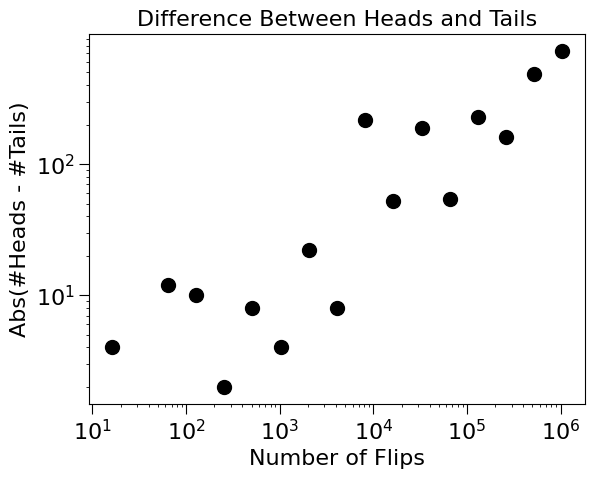

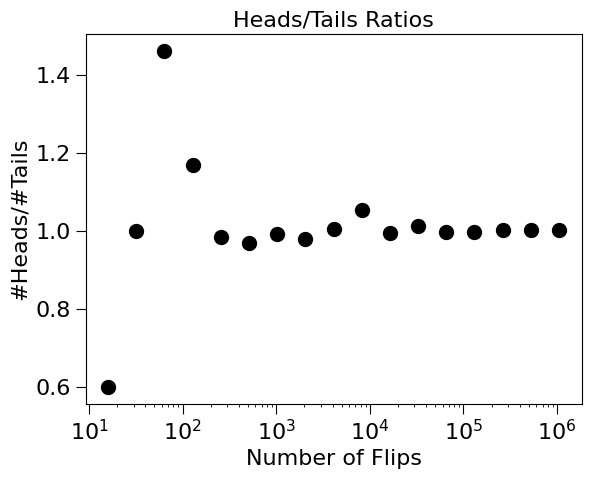

In [11]:
def flip_plot(min_exp, max_exp): 
    """min_exp와 max_exp는 양의 정수이고 min_exp < max_exp라고 가정합니다.
       2**min_exp에서 2**max_exp 사이의 
       동전 던지기 결과를 그래프로 그립니다"""
    ratios, diffs, xAxis = [], [], [] 
    for exp in range(min_exp, max_exp + 1): 
        xAxis.append(2**exp) 
    for num_flips in xAxis: 
        num_heads = 0 
        for n in range(num_flips): 
            if random.choice(('H', 'T')) == 'H': 
                num_heads += 1 
        num_tails = num_flips - num_heads 
        try: 
            ratios.append(num_heads/num_tails) 
            diffs.append(abs(num_heads - num_tails)) 
        except ZeroDivisionError: 
            continue 
    plt.title('Difference Between Heads and Tails') 
    plt.xlabel('Number of Flips') 
    plt.ylabel('Abs(#Heads - #Tails)') 
    plt.xscale('log')
    plt.yscale('log')
    plt.plot(xAxis, diffs, 'ko') 
    plt.figure() 
    plt.title('Heads/Tails Ratios') 
    plt.xlabel('Number of Flips') 
    plt.ylabel('#Heads/#Tails')  
    plt.xscale('log')
    plt.plot(xAxis, ratios, 'ko') 

random.seed(0) 
flip_plot(4, 20) 

그림 17-8 분산과 표준 편차

In [12]:
def variance(X): 
    """X는 숫자의 리스트라고 가정합니다. 
       X의 분산을 반환합니다""" 
    mean = sum(X)/len(X) 
    tot = 0.0 
    for x in X: 
        tot += (x - mean)**2 
    return tot/len(X) 

def std_dev(X): 
    """X는 숫자의 리스트라고 가정합니다. 
       X의 표준 편차를 반환합니다""" 
    return variance(X)**0.5 

그림 17-9 동전 던지기 시뮬레이션을 위한 헬퍼 함수

In [13]:
def make_plot(x_vals, y_vals, title, x_label, y_label, style, 
              log_x = False, log_y = False): 
    plt.figure() 
    plt.title(title) 
    plt.xlabel(x_label) 
    plt.ylabel(y_label) 
    plt.plot(x_vals, y_vals, style) 
    if log_x: 
        plt.semilogx() 
    if log_y: 
        plt.semilogy() 

그림 17-10 동전 던지기 시뮬레이션

In [14]:
def run_trial(num_flips): 
    num_heads = 0 
    for n in range(num_flips): 
        if random.choice(('H', 'T')) == 'H': 
            num_heads += 1 
    num_tails = num_flips - num_heads 
    return (num_heads, num_tails) 

def flip_plot1(min_exp, max_exp, num_trials): 
    """min_exp, max_exp, num_trials은 int >0이고 min_exp < max_exp라고 가정합니다.
       2**min_exp에서 2**max_exp 사이의 
       동전 던지기 num_trials 시도의 결과를 그래프로 그립니다""" 
    ratios_means, diffs_means, ratios_SDs, diffs_SDs = [], [], [], [] 
    x_axis = [] 
    for exp in range(min_exp, max_exp + 1): 
        x_axis.append(2**exp) 
    for num_flips in x_axis: 
        ratios, diffs = [], [] 
        for t in range(num_trials): 
            num_heads, num_tails = run_trial(num_flips) 
            ratios.append(num_heads/num_tails) 
            diffs.append(abs(num_heads - num_tails)) 
        ratios_means.append(sum(ratios)/num_trials) 
        diffs_means.append(sum(diffs)/num_trials) 
        ratios_SDs.append(std_dev(ratios)) 
        diffs_SDs.append(std_dev(diffs)) 
    title = f'Mean Heads/Tails Ratios ({num_trials} Trials)' 
    make_plot(x_axis, ratios_means, title, 'Number of Flips', 
              'Mean Heads/Tails', 'ko', log_x = True) 
    title = f'SD Heads/Tails Ratios ({num_trials} Trials)' 
    make_plot(x_axis, ratios_SDs, title, 'Number of Flips', 
              'Standard Deviation', 'ko', log_x = True, log_y = True) 
    
    title = f'Mean abs(#Heads - #Tails) ({num_trials} Trials)' 
    make_plot(x_axis, diffs_means, title, 
              'Number of Flips', 'Mean abs(#Heads - #Tails)', 'ko', 
              log_x = True, log_y = True) 
    title = f'SD abs(#Heads - #Tails) ({num_trials} Trials)' 
    make_plot(x_axis, diffs_SDs, title, 
              'Number of Flips', 'Standard Deviation', 'ko', 
              log_x = True, log_y = True) 

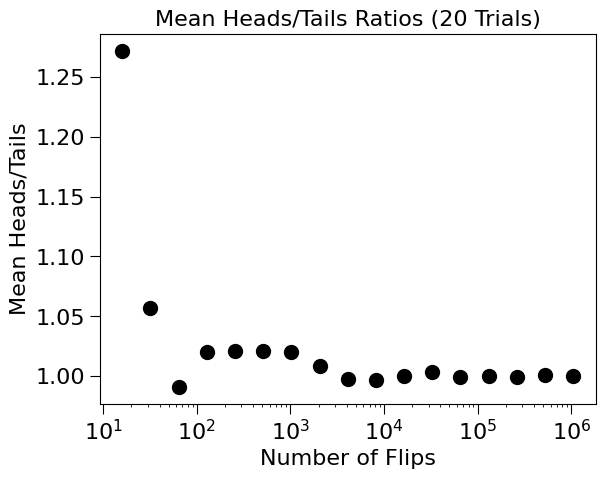

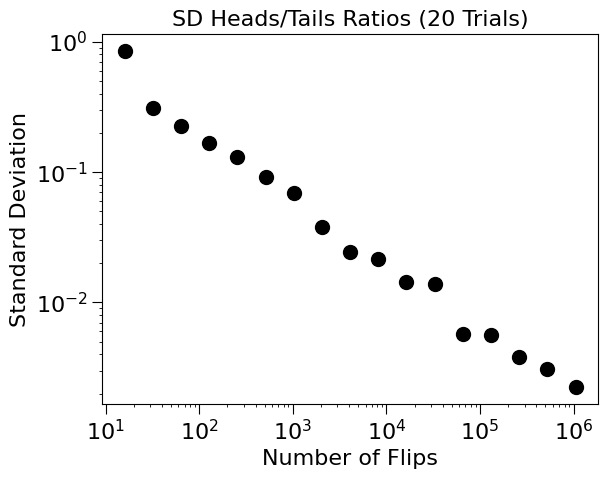

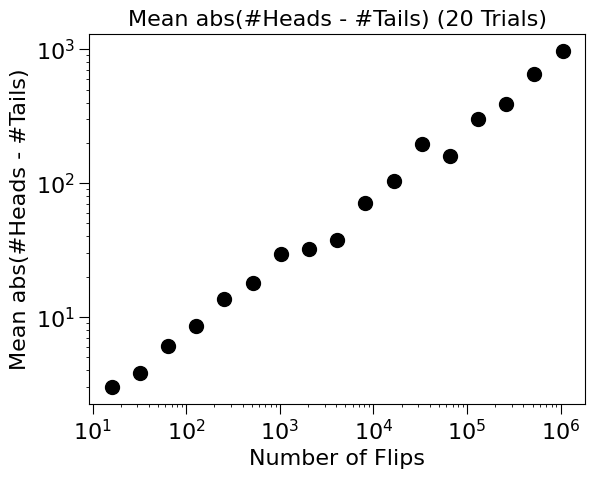

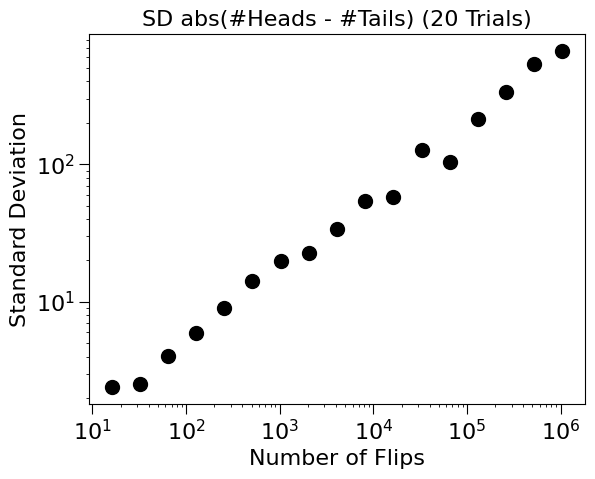

In [15]:
random.seed(0)
flip_plot1(4, 20, 20)

그림 17-14 변동 계수

In [16]:
def CV(X): 
    mean = sum(X)/len(X) 
    try: 
        return std_dev(X)/mean 
    except ZeroDivisionError: 
        return float('nan') 

그림 17-15 `flip_plot`의 최종 버전

In [17]:
def flip_plot2(min_exp, max_exp, num_trials): 
    """min_exp, max_exp, num_trials은 int >0이고 min_exp < max_exp라고 가정합니다.
       2**min_exp에서 2**max_exp 사이의 
       동전 던지기 num_trials 시도의 결과를 그래프로 그립니다"""
    ratios_means, diffs_means, ratios_SDs, diffs_SDs = [], [], [], [] 
    ratios_CVs, diffs_CVs, x_axis = [], [], [] 
    for exp in range(min_exp, max_exp + 1): 
        x_axis.append(2**exp) 
    for num_flips in x_axis: 
        ratios, diffs = [], [] 
        for t in range(num_trials): 
            num_heads, num_tails = run_trial(num_flips) 
            ratios.append(num_heads/float(num_tails)) 
            diffs.append(abs(num_heads - num_tails)) 
        ratios_means.append(sum(ratios)/num_trials) 
        diffs_means.append(sum(diffs)/num_trials) 
        ratios_SDs.append(std_dev(ratios)) 
        diffs_SDs.append(std_dev(diffs)) 
        ratios_CVs.append(CV(ratios)) 
        diffs_CVs.append(CV(diffs)) 
    num_trials_str = ' (' + str(num_trials) + ' Trials)' 
    title = f'Mean Heads/Tails Ratios (' + str(num_trials) + ' Trials)' 
    make_plot(x_axis, ratios_means, title, 'Number of flips', 
              'Mean Heads/Tails', 'ko', log_x = True) 
    title = 'SD Heads/Tails Ratios' + num_trials_str 
    make_plot(x_axis, ratios_SDs, title, 'Number of flips', 
              'Standard Deviation', 'ko', log_x = True, log_y = True) 
    title = 'Mean abs(#Heads - #Tails)' + num_trials_str 
    make_plot(x_axis, diffs_means, title,'Number of Flips', 
              'Mean abs(#Heads - #Tails)', 'ko', 
              log_x = True, log_y = True) 
    title = 'SD abs(#Heads - #Tails)' + num_trials_str 
    make_plot(x_axis, diffs_SDs, title, 'Number of Flips', 
              'Standard Deviation', 'ko', log_x = True, log_y = True) 
    title = 'Coeff. of Var. abs(#Heads - #Tails)' + num_trials_str 
    make_plot(x_axis, diffs_CVs, title, 'Number of Flips', 
              'Coeff. of Var.', 'ko', log_x = True) 
    title = 'Coeff. of Var. Heads/Tails Ratio' + num_trials_str 
    make_plot(x_axis, ratios_CVs, title, 'Number of Flips', 
              'Coeff. of Var.', 'ko', log_x = True, log_y = True) 

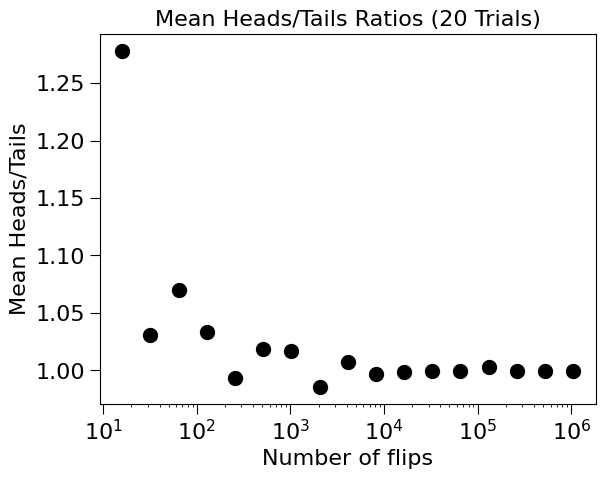

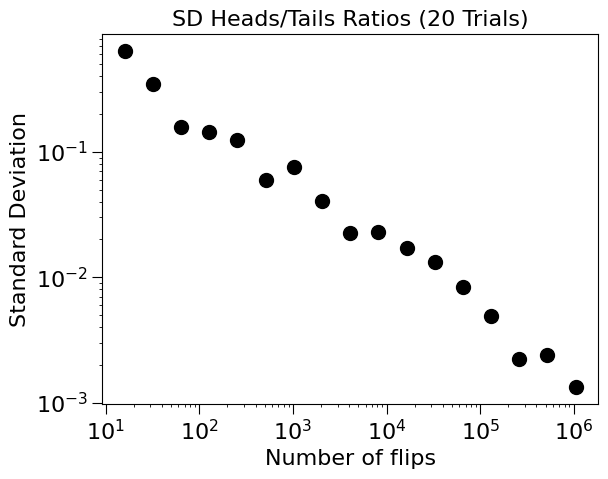

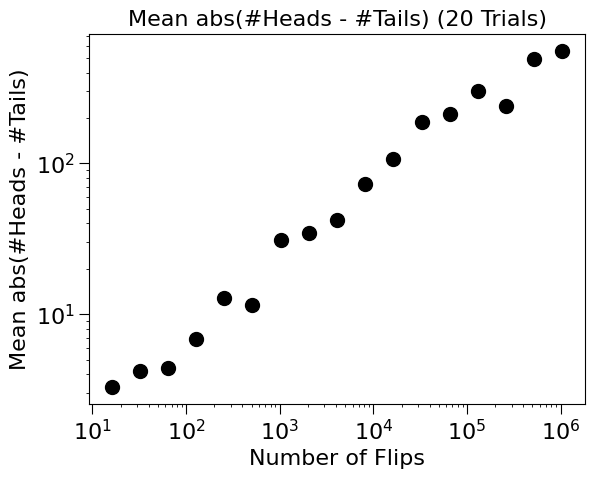

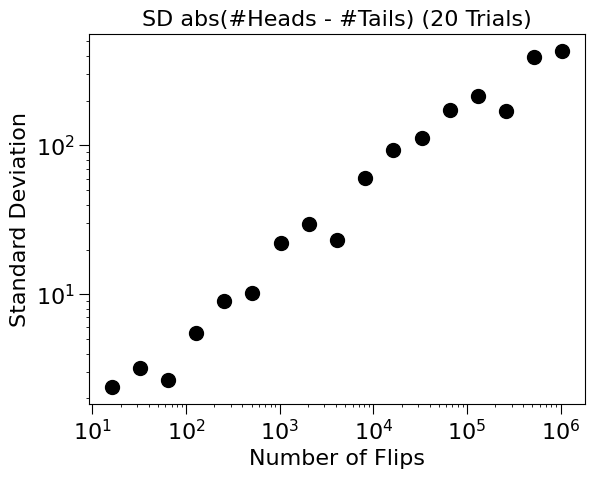

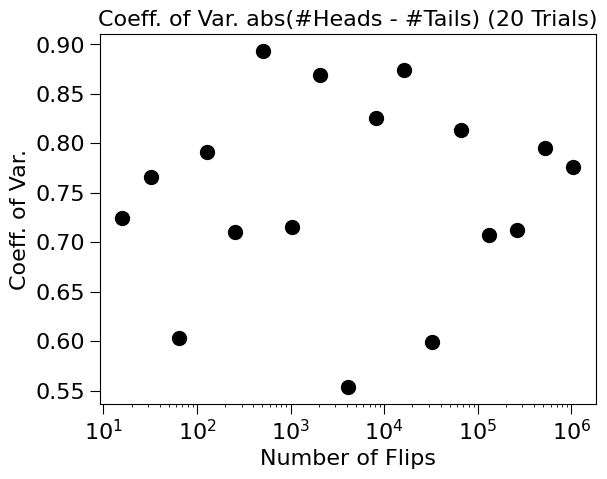

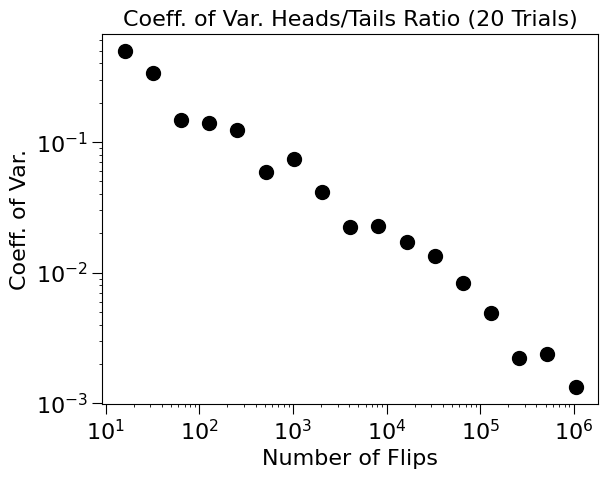

In [18]:
flip_plot2(4, 20, 20)

## 17.4 분포

그림 17-19 히스토그램 생성 코드와 그래프

Text(0, 0.5, 'Number of Occurrences')

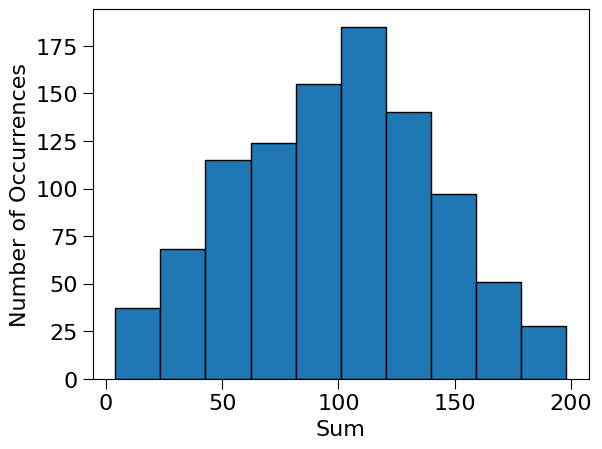

In [19]:
random.seed(0)
vals = []
for i in range(1000):
    num1 = random.choice(range(0, 101))
    num2 = random.choice(range(0, 101))
    vals.append(num1 + num2)
plt.hist(vals, bins=10, ec='k')
plt.xlabel('Sum')
plt.ylabel('Number of Occurrences')

그림 17-20 동전 던지기 히스토그램 그리기

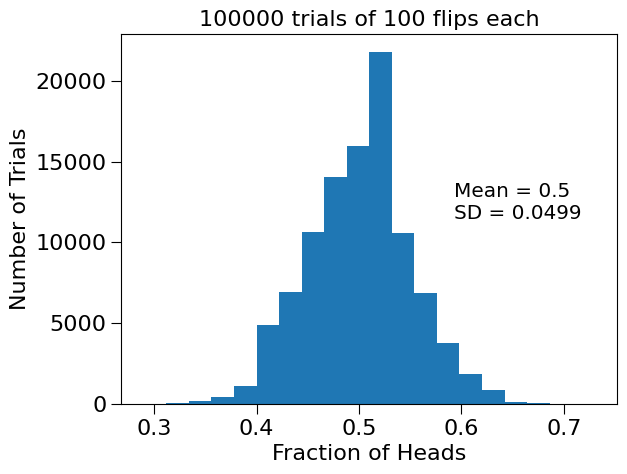

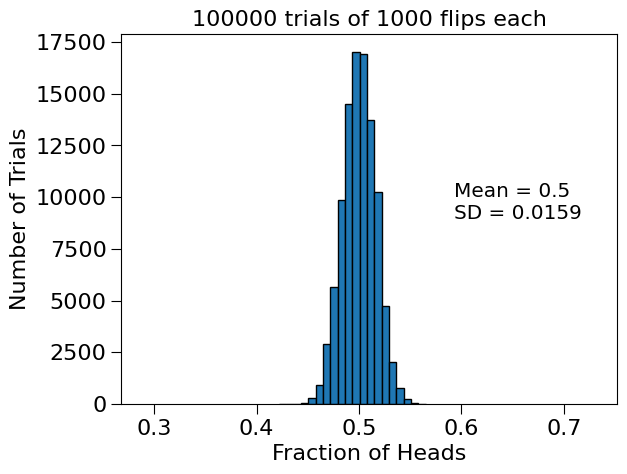

In [20]:
def flip(num_flips): 
    """num_flips은 양의 정수라고 가정합니다""" 
    heads = 0 
    for i in range(num_flips): 
        if random.choice(('H', 'T')) == 'H': 
            heads += 1 
    return heads/float(num_flips) 

def flip_sim(num_flips_per_trial, num_trials): 
    frac_heads = [] 
    for i in range(num_trials): 
        frac_heads.append(flip(num_flips_per_trial)) 
    mean = sum(frac_heads)/len(frac_heads) 
    sd = std_dev(frac_heads) 
    return (frac_heads, mean, sd) 

def label_plot(num_flips, num_trials, mean, sd): 
    plt.title(str(num_trials) + ' trials of ' 
              + str(num_flips) + ' flips each') 
    plt.xlabel('Fraction of Heads') 
    plt.ylabel('Number of Trials') 
    plt.annotate('Mean = ' + str(round(mean, 4)) 
        + '\nSD = ' + str(round(sd, 4)), size='x-large', 
        xycoords = 'axes fraction', xy = (0.67, 0.5)) 

def make_plots(num_flips1, num_flips2, num_trials): 
    val1, mean1, sd1 = flip_sim(num_flips1, num_trials) 
    plt.hist(val1, bins = 20) 
    x_min,x_max = plt.xlim() 
    label_plot(num_flips1, num_trials, mean1, sd1) 
    plt.figure() 
    val2, mean2, sd2 = flip_sim(num_flips2, num_trials) 
    plt.hist(val2, bins = 20, ec = 'k') 
    plt.xlim(x_min, x_max) 
    label_plot(num_flips2, num_trials, mean2, sd2) 

random.seed(0)
make_plots(100, 1000, 100000) 

### 17.4.1 확률 분포

### 17.4.2 정규 분포 

In [21]:
print(scipy.integrate.quad(abs, 0, 5)[0]) 

12.5


그림 17-26 경험 법칙 확인하기

In [22]:
from scipy.stats import norm

In [23]:
import scipy.integrate 

def gaussian(x, mu, sigma): 
    """x, mu, sigma는 숫자라고 가정합니다. 
       평균이 mu이고 표준 편차가 sigma인 가우스 분포에 대해 P(x)의 값을 반환합니다""" 
    factor1 = (1.0/(sigma*((2*np.pi)**0.5))) 
    factor2 = np.e**-(((x-mu)**2)/(2*sigma**2)) 
    return factor1*factor2 

def check_empirical(mu_max, sigma_max, num_trials): 
    """mu_max, sigma_max, num_trials를 양의 정수라고 가정합니다
       (랜덤하게 선택한 mu와 sigma를 가진) 가우스 분포에서 표준 편차 1, 2, 3 안에 
       해당하는 값의 비율을 출력합니다""" 
    for t in range(num_trials): 
        mu = random.randint(-mu_max, mu_max + 1) 
        sigma = random.randint(1, sigma_max) 
        print('mu =', mu, '와 sigma =', sigma, '일 때') 
        for num_std in (1, 2, 3): 
            area = norm.cdf(mu+num_std*sigma, mu, sigma)-norm.cdf(mu-num_std*sigma, mu, sigma)
            # area = scipy.integrate.quad(gaussian, mu-num_std*sigma, 
            #                             mu+num_std*sigma, 
            #                             (mu, sigma))[0] 
            print(' ', num_std, '표준 편차 이내 비율 =', 
                  round(area, 4)) 

random.seed(0)
check_empirical(10, 10, 3) 

mu = 2 와 sigma = 7 일 때
  1 표준 편차 이내 비율 = 0.6827
  2 표준 편차 이내 비율 = 0.9545
  3 표준 편차 이내 비율 = 0.9973
mu = -9 와 sigma = 5 일 때
  1 표준 편차 이내 비율 = 0.6827
  2 표준 편차 이내 비율 = 0.9545
  3 표준 편차 이내 비율 = 0.9973
mu = 6 와 sigma = 8 일 때
  1 표준 편차 이내 비율 = 0.6827
  2 표준 편차 이내 비율 = 0.9545
  3 표준 편차 이내 비율 = 0.9973


In [24]:
for x in range(-2, 3): 
    print(gaussian(x, 0, 1)) 

0.05399096651318806
0.24197072451914337
0.3989422804014327
0.24197072451914337
0.05399096651318806


**손가락 운동**

In [25]:
scipy.integrate.quad(gaussian, -1, 1, (0, 1))[0]

0.682689492137086

In [26]:
def show_error_bars(min_exp, max_exp, num_trials): 
    """Assumes min_exp and max_exp positive ints; min_exp < max_exp 
         num_trials a positive integer 
       Plots mean fraction of heads with error bars""" 
    means, sds, x_vals = [], [], [] 
    for exp in range(min_exp, max_exp + 1): 
        x_vals.append(2**exp) 
        frac_heads, mean, sd = flip_sim(2**exp, num_trials) 
        means.append(mean) 
        sds.append(sd) 
    plt.errorbar(x_vals, means, yerr=1.96*np.array(sds)) 
    plt.semilogx() 
    plt.title('Mean Fraction of Heads (' 
              + str(num_trials) + ' trials)') 
    plt.xlabel('Number of flips per trial') 
    plt.ylabel('Fraction of heads & 95% confidence') 

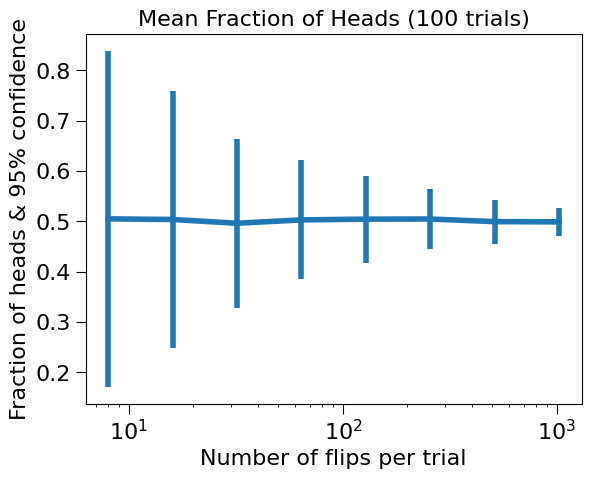

In [27]:
show_error_bars(3, 10, 100)

### 17.4.3 연속 균등 분포와 이산 균등 분포

### 17.4.4 이항 분포와 다항 분포

**손가락 운동**

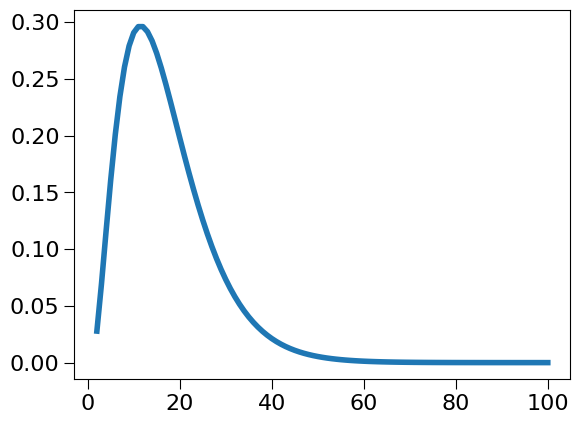

In [28]:
import math

def binom_dist(k):
    binom_coef = math.factorial(k)/(math.factorial(2)*math.factorial(k-2))
    return binom_coef*(1/6)**2*(5/6)**(k-2)

probs = []
for k in range(2, 101):
    probs.append(binom_dist(k))

plt.plot(range(2, 101), probs)
plt.show()

### 17.4.5 지수 분포와 기하 분포

그림 17-29 분자의 지수적 감소

In [29]:
def clear(n, p, steps): 
    """n와 steps은 양의 정수이고 p은 실수입니다. 
         n: 초기 분자 개수
         p: 분자가 사라질 확률
         steps: 시뮬레이션 기간""" 
    num_remaining = [n] 
    for t in range(steps): 
        num_remaining.append(n*((1-p)**t)) 
    plt.plot(num_remaining) 
    plt.xlabel('Time') 
    plt.ylabel('Molecules Remaining') 
    plt.title('Clearance of Drug') 

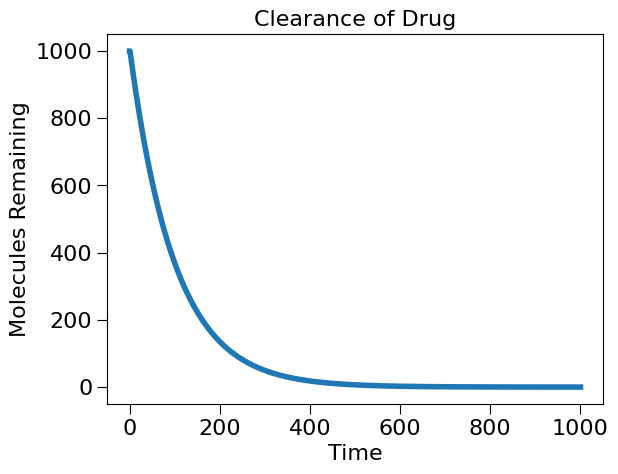

In [30]:
clear(1000, 0.01, 1000)

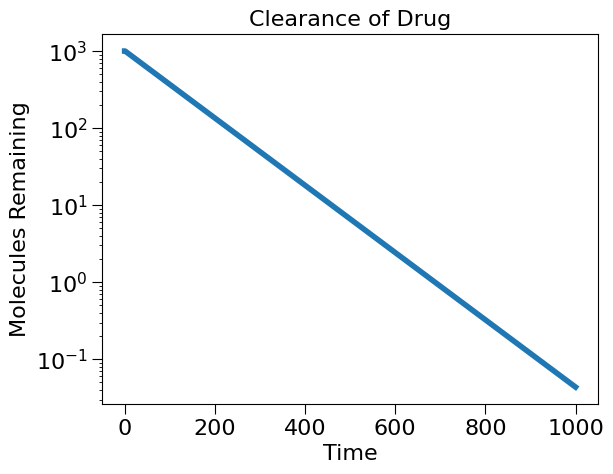

In [31]:
def clear2(n, p, steps): 
    """n와 steps은 양의 정수이고 p은 실수입니다. 
         n: 초기 분자 개수
         p: 분자가 사라질 확률
         steps: 시뮬레이션 기간""" 
    num_remaining = [n] 
    for t in range(steps): 
        num_remaining.append(n*((1-p)**t)) 
    plt.plot(num_remaining) 
    plt.xlabel('Time') 
    plt.ylabel('Molecules Remaining') 
    plt.semilogy()
    plt.title('Clearance of Drug') 

clear2(1000, 0.01, 1000)

그림 17-32 기하 분포 만들기

Text(0.5, 1.0, 'Probability of Starting Each Try = 0.5')

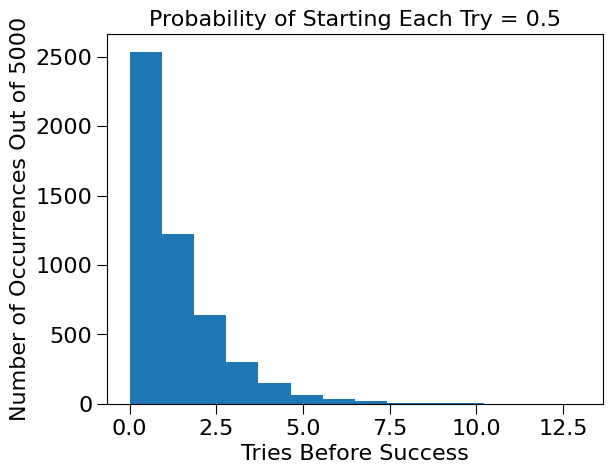

In [32]:
def successful_starts(success_prob, num_trials): 
    """success_prob은 나타내는 한 시도의 성공 확률을 나타내는 실수이고, 
         num_trials은 양의 정수라고 가정합니다.
       성공하기 전에 수행한 시행 리스트를 반환합니다""" 
    tries_before_success = [] 
    for t in range(num_trials): 
        consec_failures = 0 
        while random.random() > success_prob: 
            consec_failures += 1 
        tries_before_success.append(consec_failures) 
    return tries_before_success 

prob_of_success = 0.5 
num_trials = 5000 
distribution = successful_starts(prob_of_success, num_trials) 
plt.hist(distribution, bins = 14) 
plt.xlabel('Tries Before Success') 
plt.ylabel('Number of Occurrences Out of ' + str(num_trials)) 
plt.title('Probability of Starting Each Try = ' 
          + str(prob_of_success)) 

### 17.4.6 벤포드 분포

## 17.5 해싱과 충돌

In [33]:
def collision_prob(n, k): 
    prob = 1.0 
    for i in range(1, k): 
        prob = prob * ((n - i)/n) 
    return 1 - prob 

In [34]:
collision_prob(1000, 50)

0.7122686568799875

In [35]:
collision_prob(1000, 200)

0.9999999994781328

그림 17-34 해시 테이블 시뮬레이션

In [36]:
def sim_insertions(num_indices, num_insertions): 
    """num_indices과 num_insertions는 양의 정수라고 가정합니다. 
       충돌이 있으면 1, 그렇지 않으면 0을 반환합니다""" 
    choices = range(num_indices) #가능한 인덱스 리스트 
    used = [] 
    for i in range(num_insertions): 
        hash_val = random.choice(choices) 
        if hash_val in used: #충돌
            return 1 
        else: 
            used.append(hash_val) 
    return 0 

def find_prob(num_indices, num_insertions, num_trials): 
    collisions = 0 
    for t in range(num_trials): 
        collisions += sim_insertions(num_indices, num_insertions) 
    return collisions/num_trials 

In [37]:
print('실제 충돌 확률 =', collision_prob(1000, 50)) 
print('예상 충돌 확률 =', find_prob(1000, 50, 10000)) 
print('실제 충돌 확률 =', collision_prob(1000, 200)) 
print('예상 충돌 확률 =', find_prob(1000, 200, 10000)) 

실제 충돌 확률 = 0.7122686568799875
예상 충돌 확률 = 0.7075
실제 충돌 확률 = 0.9999999994781328
예상 충돌 확률 = 1.0


## 17.6 잘하는 팀이 얼마나 자주 이기나요? 

그림 17-35 월드 시리즈 시뮬레이션

In [38]:
def play_series(num_games, team_prob): 
    numWon = 0 
    for game in range(num_games): 
        if random.random() <= team_prob: 
            numWon += 1 
    return (numWon > num_games//2) 

def fraction_won(team_prob, num_series, series_len): 
    won = 0 
    for series in range(num_series): 
        if play_series(series_len, team_prob): 
            won += 1 
    return won/float(num_series) 

def sim_series(num_series): 
    prob = 0.5 
    fracsWon, probs = [], [] 
    while prob <= 1.0: 
        fracsWon.append(fraction_won(prob, num_series, 7)) 
        probs.append(prob) 
        prob += 0.01 
    plt.axhline(0.95) #Draw line at 95% 
    plt.plot(probs, fracsWon, 'k', linewidth = 5) 
    plt.xlabel('Probability of Winning a Game') 
    plt.ylabel('Probability of Winning a Series') 
    plt.title(str(num_series) + ' Seven-Game Series') 

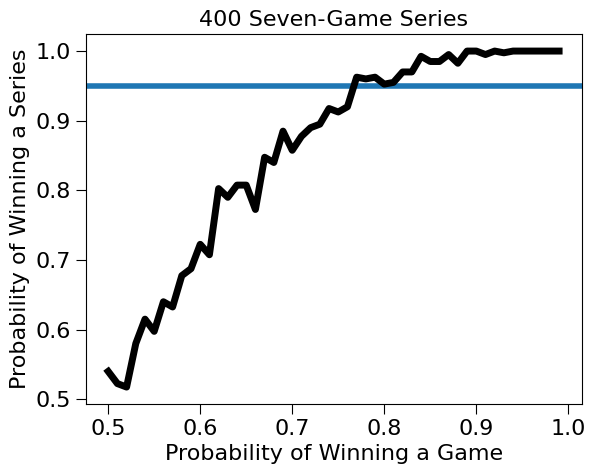

In [39]:
sim_series(400)